1. Install library

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotib.pyplot
!pip install openpyxl
!pip install wordcloud
!pip install imblearn
!pip install scikit-learn
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement matplotib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotib.pyplot


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

2. Import library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

3. Load data

In [3]:
db = pd.read_csv ("diabetes.csv")
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,NaN,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,NaN,47.0,1


4. Tampilkan 5 baris pertama data untuk melihat struktur awal

In [4]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


5. Mengecek apakah ada missing values di data

In [5]:
print("\nMissing values per kolom:")
db.isnull().sum()


Missing values per kolom:


Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

6. Pilih kolom numerik untuk imputasi

In [6]:
# Hanya kolom numerik yang akan diimputasi dengan mean, median, modus
numerical_cols = db.select_dtypes(include=[np.number]).columns

print("\nKolom numerik yang akan diimputasi:", numerical_cols)


Kolom numerik yang akan diimputasi: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [7]:
# Membuat copy data untuk masing-masing metode imputasi
db_mean = db.copy()
db_median = db.copy()
db_mode = db.copy()

7. Imputasi missing values pada kolom numerik saja

In [8]:
imputer_mean = SimpleImputer(strategy="mean")
imputer_median = SimpleImputer(strategy="median")
imputer_mode = SimpleImputer(strategy="most_frequent")

In [12]:
# Terapkan imputasi pada kolom numerik
db_mean[numerical_cols] = imputer_mean.fit_transform(db_mean[numerical_cols])

print("\nData setelah Imputasi Mean:")
db_mean.head()


Data setelah Imputasi Mean:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.0,35.0,0.0,31.99368,0.627000,33.166124,1.0
1,1.0,85.000000,66.0,29.0,0.0,31.99368,0.351000,31.000000,0.0
2,8.0,183.000000,64.0,0.0,0.0,23.30000,0.672000,32.000000,1.0
3,1.0,89.000000,66.0,23.0,94.0,28.10000,0.167000,21.000000,0.0
4,0.0,120.462481,40.0,35.0,168.0,43.10000,0.465363,33.000000,1.0


In [13]:
db_median[numerical_cols] = imputer_median.fit_transform(db_median[numerical_cols])

print("\nData setelah Imputasi Median:")
db_median.head()


Data setelah Imputasi Median:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1.0
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0.0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1.0


In [14]:
db_mode[numerical_cols] = imputer_mode.fit_transform(db_mode[numerical_cols])

print("\nData setelah Imputasi Modus:")
db_mode.head()


Data setelah Imputasi Modus:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,100.0,72.0,35.0,0.0,31.2,0.627,22.0,1.0
1,1.0,85.0,66.0,29.0,0.0,31.2,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,100.0,40.0,35.0,168.0,43.1,0.207,33.0,1.0


8. Cek korelasi antar variabel dengan heatmap

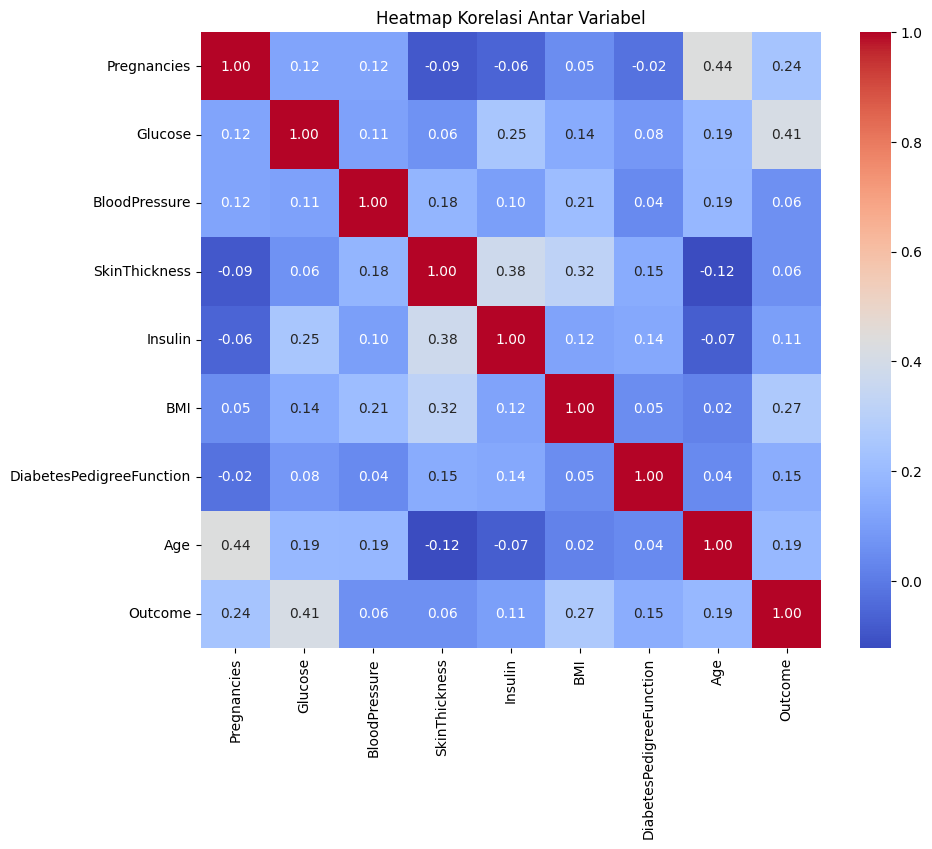

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(db_mean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

9. Imbalance Handling data dengan undersampling

In [16]:
# Misalnya kolom target bernama 'Outcome', sesuaikan dengan kolom target di data diabetes
target_column = "Outcome"  # nama kolom
if target_column in db_mean.columns:
    X = db_mean.drop(target_column, axis=1)  # Memisahkan fitur
    y = db_mean[target_column]  # Target
else:
    raise ValueError(f"Kolom '{target_column}' tidak ditemukan dalam data.")

In [17]:
# melihat outlier
def count_outliers_iqr(db):
    Q1 = db.quantile(0.25)
    Q3 = db.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((db < lower_bound) | (db > upper_bound)).sum()

In [18]:
outliers = {}
for col in db.select_dtypes(include=['int64','float64']).columns:
    outliers[col] = count_outliers_iqr(db[col])
    
#convert the result into a datafream for easier viewing
outliers_counts_db = pd.DataFrame(list(outliers.items()), columns =['Column', 'Outlier Count'])

#display the outlier counts DataFrame

outliers_counts_db

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,23
7,Age,16
8,Outcome,0


In [19]:
# Melihat distribusi kelas pada target
print("\nDistribusi kelas sebelum undersampling:")
y.value_counts()


Distribusi kelas sebelum undersampling:


Outcome
0.0    500
1.0    268
Name: count, dtype: int64

In [20]:
# Melakukan undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [21]:
# Melihat distribusi kelas setelah undersampling
print("\nDistribusi kelas setelah undersampling:")
pd.Series(y_resampled).value_counts()


Distribusi kelas setelah undersampling:


Outcome
0.0    268
1.0    268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

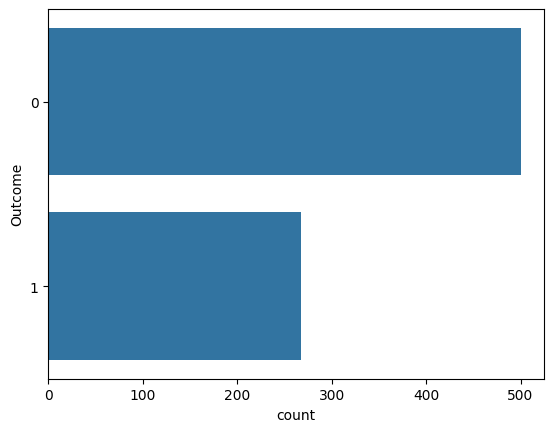

In [22]:
sns.countplot(data=db, y="Outcome")

<Axes: xlabel='count', ylabel='Outcome'>

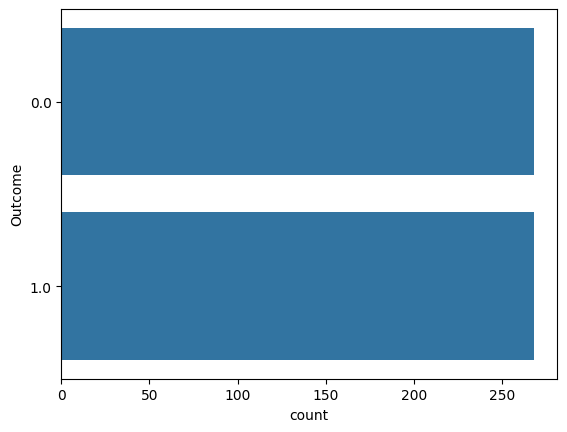

In [30]:
sns.countplot(data=X_resampled, y=y_resampled)

Text(0.5, 0.98, 'Histograms of Pima Indian Diabetes DataSet Feature')

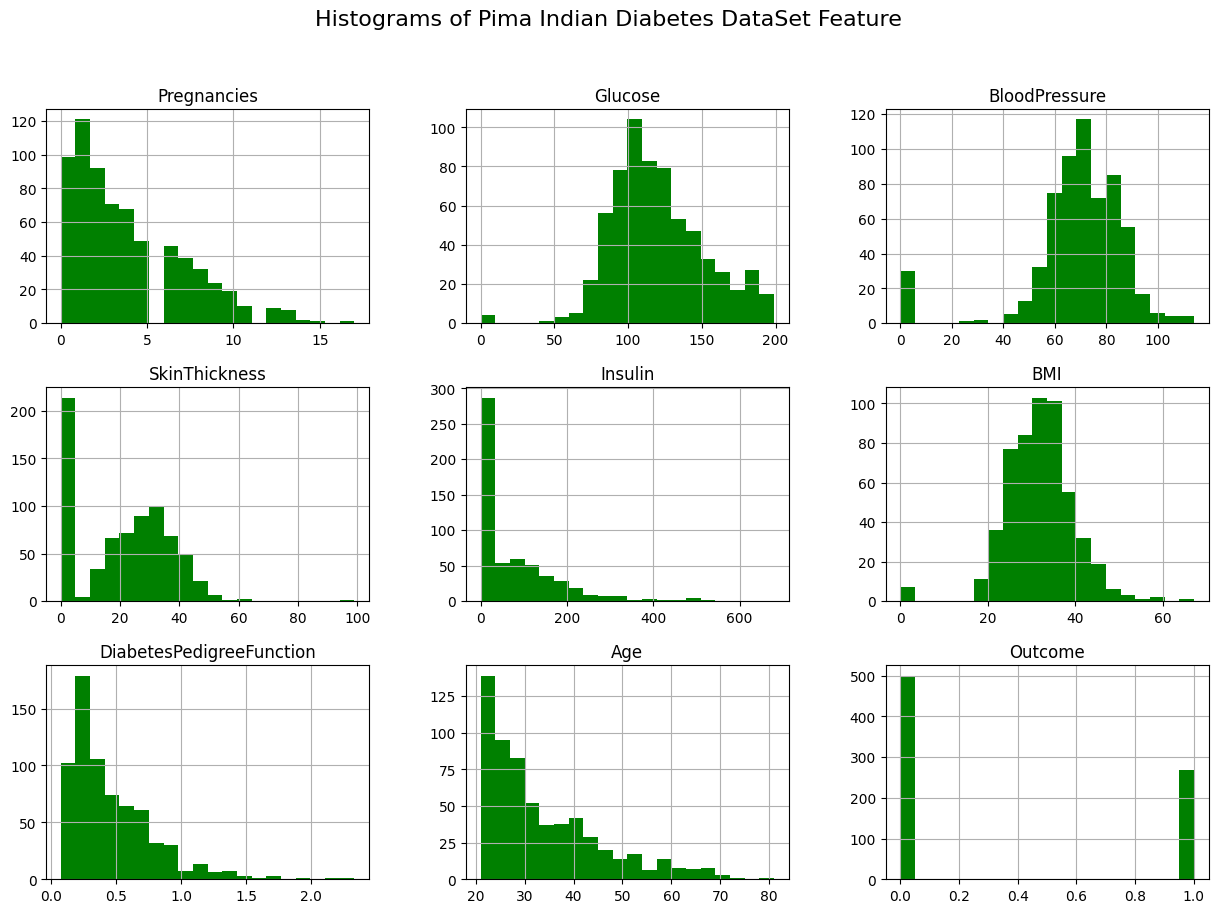

In [25]:
db.hist(bins=20, figsize=(15, 10), layout=(3,3),
            color="green");
plt.suptitle("Histograms of Pima Indian Diabetes DataSet Feature",
             fontsize=16)

10. Scaling data dengan RobustScaler dan MinMaxScaler

In [26]:
# Robust Scaler
scaler_robust = RobustScaler()
X_robust_scaled = scaler_robust.fit_transform(X_resampled)

In [27]:
# MinMax Scaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X_resampled)

In [28]:
# Tampilkan hasil scaling
print("\nData setelah scaling dengan RobustScaler (5 baris pertama):")
X_robust_scaled[:5]


Data setelah scaling dengan RobustScaler (5 baris pertama):


array([[-0.56063676, -0.71098427,  0.08672638,  0.5625    ,  0.        ,
         0.        , -0.59030218, -0.26384365],
       [ 0.23936324,  0.        , -1.74660695, -0.6875    , -0.80712307,
         0.41617554,  0.63527758, -0.68051031],
       [-0.16063676, -0.28674184, -0.91327362,  0.28125   , -0.34518081,
        -0.60821471,  0.00562193, -0.93051031],
       [-0.36063676,  0.2587127 ,  1.25339305, -0.6875    , -0.80712307,
        -0.97406837, -0.40477864, -0.51384365],
       [ 0.63936324, -0.55946912,  0.42005972,  0.5625    ,  0.        ,
         1.26983407, -0.62965566,  0.        ]])

In [29]:
print("\nData setelah scaling dengan MinMaxScaler (5 baris pertama):")
X_minmax_scaled[:5]


Data setelah scaling dengan MinMaxScaler (5 baris pertama):


array([[0.05882353, 0.48743719, 0.61403509, 0.4040404 , 0.14158098,
        0.47680597, 0.0596882 , 0.17647059],
       [0.29411765, 0.6053391 , 0.42105263, 0.        , 0.        ,
        0.50223547, 0.25389755, 0.07843137],
       [0.17647059, 0.55778894, 0.50877193, 0.31313131, 0.08103131,
        0.43964232, 0.15412027, 0.01960784],
       [0.11764706, 0.64824121, 0.73684211, 0.        , 0.        ,
        0.41728763, 0.08908686, 0.11764706],
       [0.41176471, 0.51256281, 0.64912281, 0.4040404 , 0.14158098,
        0.55439642, 0.05345212, 0.23855145]])